<a href="https://colab.research.google.com/github/92Thahimum-Hassan/Machine_Learning_Project_CSCE_585/blob/main/Transfer_Learning_of_CIFAR_10_%26_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from keras.datasets import cifar10

#Load the dataset:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [20]:
print("There are {} train images and {} test images.".format(X_train.shape[0], X_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


In [21]:
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Shape of each image in the training data:  (32, 32, 3)


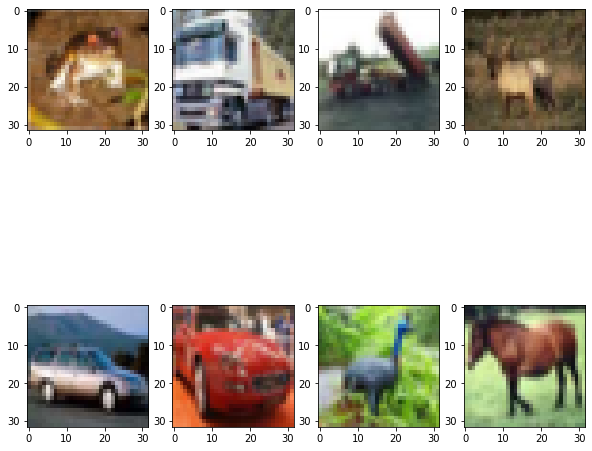

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print('Shape of each image in the training data: ', X_train.shape[1:])

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)               

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [25]:
X_train_scratch = X_train/255.
X_test_scratch = X_test/255.

In [26]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [27]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/10
1249/1250 [============================>.] - ETA: 0s - loss: 2.7557 - accuracy: 0.1015
Epoch 00001: val_loss improved from inf to 2.75639, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 45s 36ms/step - loss: 2.7558 - accuracy: 0.1014 - val_loss: 2.7564 - val_accuracy: 0.1014
Epoch 2/10
1249/1250 [============================>.] - ETA: 0s - loss: 2.7618 - accuracy: 0.0996
Epoch 00002: val_loss did not improve from 2.75639
1250/1250 [==============================] - 44s 35ms/step - loss: 2.7618 - accuracy: 0.0997 - val_loss: 2.7564 - val_accuracy: 0.1014
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 2.7618 - accuracy: 0.0997
Epoch 00003: val_loss did not improve from 2.75639
1250/1250 [==============================] - 45s 36ms/step - loss: 2.7618 - accuracy: 0.0997 - val_loss: 2.7564 - val_accuracy: 0.1014
Epoch 4/10
1249/1250 [============================>.] - ETA: 0s - loss: 2.7617 - accuracy: 0.0997
Epoch 0000

In [28]:
#Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 2.7607 - accuracy: 0.1000
Accuracy on the Test Images:  0.10000000149011612


In [29]:
#Importing the ResNet50 model
from keras.applications.resnet50 import ResNet50, preprocess_input

#Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False)

In [30]:
# #Reshaping the training data
for i in range(0, len(X_train)):
    X_train_new =  np.reshape(X_train[i], newshape=(-1,2,2,3)).astype('float32')
# X_train_new = np.reshape(X_train[i],newshape=(-1, 2, 3) for i in range(0, len(X_train)))

# #Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_train_input = preprocess_input(X_train)

# #Creating bottleneck features for the training data
train_features = model.predict(resnet_train_input)

# #Saving the bottleneck features
np.savez('resnet_features_train', features=train_features)
len(X_train)

50000

In [31]:
# #Reshaping the training data
for i in range(0, len(X_test)):
    X_test_new =  np.reshape(X_test[i], newshape=(2,2,3,-1)).astype('float32')
# X_train_new = np.reshape(X_train[i],newshape=(-1, 2, 3) for i in range(0, len(X_train)))

# #Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_test_input = preprocess_input(X_test)

# #Creating bottleneck features for the training data
test_features = model.predict(resnet_test_input)

# #Saving the bottleneck features
np.savez('resnet_features_test', features=test_features)
len(X_test)

10000

In [32]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [34]:
history1 = model.fit(train_features, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10
1233/1250 [============================>.] - ETA: 0s - loss: 2.0728 - accuracy: 0.5221
Epoch 00001: val_loss improved from 2.75639 to 1.44234, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0662 - accuracy: 0.5229 - val_loss: 1.4423 - val_accuracy: 0.6026
Epoch 2/10
1235/1250 [============================>.] - ETA: 0s - loss: 1.5654 - accuracy: 0.5841
Epoch 00002: val_loss improved from 1.44234 to 1.35032, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5681 - accuracy: 0.5837 - val_loss: 1.3503 - val_accuracy: 0.6195
Epoch 3/10
1247/1250 [============================>.] - ETA: 0s - loss: 1.5410 - accuracy: 0.5921
Epoch 00003: val_loss improved from 1.35032 to 1.33212, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5416 - accuracy: 0.5921 - val_loss: 1.3321 - val_accuracy: 0.6311
Epoch 4/10
1242/1250 [

In [35]:
#Evaluate the model on the test data
score1  = model.evaluate(test_features, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score1[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.5241 - accuracy: 0.6063
Accuracy on the Test Images:  0.6062999963760376


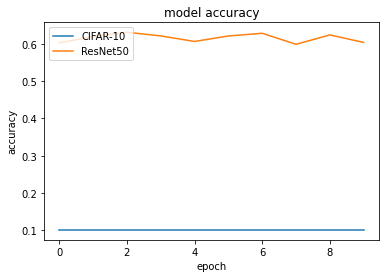

In [36]:
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CIFAR-10', 'ResNet50'], loc='upper left')
plt.show()

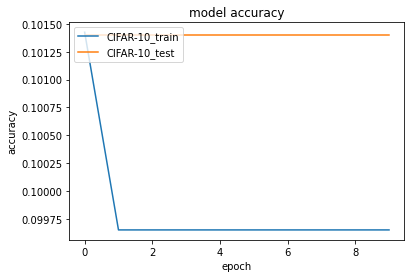

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CIFAR-10_train', 'CIFAR-10_test'], loc='upper left')
plt.show()

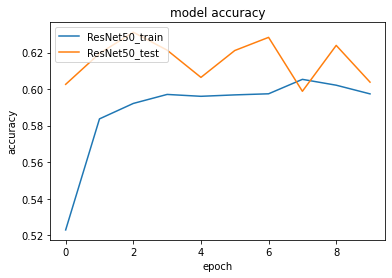

In [38]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ResNet50_train', 'ResNet50_test'], loc='upper left')
plt.show()